## Appendix 1: Dictionary of cities

In [1]:
# Here is the list of cities 
cities_list = ["Seoul", "Hyderabad", "Ho Chi Minh", "Kuala Lumpur", 
              "Singapore", "Bangkok", "Tokyo", "Hongkong", "Mumbai"]

# Transform the list to dictionary so we can access id number of each city later 
cities = {key: value for value, key in enumerate(cities_list)}
cities

{'Seoul': 0,
 'Hyderabad': 1,
 'Ho Chi Minh': 2,
 'Kuala Lumpur': 3,
 'Singapore': 4,
 'Bangkok': 5,
 'Tokyo': 6,
 'Hongkong': 7,
 'Mumbai': 8}

In [2]:
# Create an inversed dictionary to translate the id number to city name later 
cities_reverse = {value: key for key, value in cities.items()}
cities_reverse

{0: 'Seoul',
 1: 'Hyderabad',
 2: 'Ho Chi Minh',
 3: 'Kuala Lumpur',
 4: 'Singapore',
 5: 'Bangkok',
 6: 'Tokyo',
 7: 'Hongkong',
 8: 'Mumbai'}

## Appendix 2: Test cases 

In [3]:
# 3 test cases to find the cheapest flight for Minervans 
# The data is the actual price from Google Flights and rounded to the nearest multiple of 5 
test1 = [("Seoul", "Bangkok", 315), ("Seoul", "Singapore", 360), ("Seoul", "Kuala Lumpur", 245), 
         ("Bangkok", "Hyderabad", 280), ("Kuala Lumpur", "Hyderabad", 105), ("Singapore", "Hyderabad", 250)]
test2 = [("Seoul", "Bangkok", 315), ("Seoul", "Singapore", 360), ("Seoul", "Kuala Lumpur", 245), 
         ("Bangkok", "Hyderabad", 280), ("Kuala Lumpur", "Hyderabad", 105), ("Singapore", "Hyderabad", 250),
         ("Seoul", "Ho Chi Minh", 200), ("Ho Chi Minh", "Singapore", 45), ("Bangkok", "Singapore", 70)]
test3 = [("Tokyo", "Bangkok", 180), ("Tokyo", "Hongkong", 550), ("Hongkong", "Hyderabad", 470), 
         ("Bangkok", "Hyderabad", 280), ("Bangkok", "Singapore", 70), ("Singapore", "Hyderabad", 250),
         ("Bangkok", "Mumbai", 180), ("Mumbai", "Hyderabad", 40)]

## Appendix 3: 3 graph algorithms

### Bellman-Ford algorithm

In [4]:
# Declare global variables 
INF = float("inf")
MAX = 9 # MAX is 9 because we have 9 cities in the list of cities 

# Class Edge to store the information of each edge in the edge list 
class Edge:
    def __init__(self, source, target, weight):
        self.source = source 
        self.target = target 
        self.weight = weight 

# Function to create one-dimensional graph from the edge list 
def graph_1D(dictionary, edge_list):
    graph = []
    # Loop through each edge in the edge_list 
    for i in range(len(edge_list)):
        # u, v are the 2 cities
        # w is the price flying from city u to city v 
        u, v, w = edge_list[i]
        # Get the id number of each city through the dictionary 
        u = dictionary[u]
        v = dictionary[v]
        # Append it to the one-dimensional graph 
        graph.append(Edge(u, v, w))
    return graph 

# Function Bellman-Ford
def BellmanFord(start, target, nodes, dictionary, dictionary_reverse, edge_list):
    """
    
    Inputs: 
    start: Starting node
    target: Target node 
    nodes: Number of nodes in the graph 
    dictionary: The dictionary to translate the names of the node to their ID numbers 
    dictionary_reverse: The dictionary to translate the ID numbers of the nodes to their names 
    edge_list: The edge list representing the flying routes between cities 
    
    Output:
    dist[dictionary[target]]: The shortest distance from the start node to the target node 
    
    """
    # Prepare the data structures 
    graph = graph_1D(dictionary, edge_list) # To store the nodes in the graph 
    dist = [INF for i in range(MAX)] # To store the distance from one node to another 
    global pathBF # To store the path from one node to another 
    pathBF = [-1 for i in range(MAX)]
    edges = len(edge_list) # Number of edges in the graph 
    
    dist[dictionary[start]] = 0 # Initialize the function by setting the distance from the starting node to itself as 0 
    # Loop through all the nodes (n-1) times 
    for i in range(1, nodes):
        # Loop through all the edges 
        for j in range(edges):
            u = graph[j].source
            v = graph[j].target 
            w = graph[j].weight
            # If there exists a route from source u to target v with lower cost than the current one
            # then we update the distance of target v 
            if (dist[u] != INF) and (dist[u] + w < dist[v]):
                dist[v] = dist[u] + w  
                # We also update the path to node v through u 
                pathBF[v] = u 
                
    # Return the shortest distance from start node to target node
    return dist[dictionary[target]]

def printPath(start, target, dictionary, dictionary_reverse):
    """
    
    Inputs:
    start: Starting node
    target: Target node 
    dictionary: The dictionary to translate the names of the node to their ID numbers 
    dictionary_reverse: The dictionary to translate the ID numbers of the nodes to their names     
    
    Output: 
    The function directly prints out the path from the starting node to the target node 
    
    """
    # Take the ID number of the start and target node 
    s, t = dictionary[start], dictionary[target]
    # The list to store the sequence of the nodes 
    lst = []
    
    # Base case: If the target node is the same as the start node, then we just simply print it out 
    if t == s:
        print(dictionary_reverse[s])
        return 
    # Base case: There is no path from the start node to the target node, noted by "-1"
    # So we print "No path"
    elif pathBF[t] == -1:
        print("No path")
        return 
    
    while True:
        # Tracking the path from the start node to the target node in the reversed order
        # We are back tracking from the target node back to the start node 
        lst.append(t)
        t = pathBF[t]
        # When we reach the starting node, break the while loop 
        if t == s:
            lst.append(s)
            break
            
    # Reverse the sequence to print it out 
    lst.reverse()
    # Print out the order from start node to target node 
    for i in range(len(lst)-1):
        print(dictionary_reverse[lst[i]], end = " => ")
    print(dictionary_reverse[lst[-1]])

In [5]:
# Test cases 
ans = BellmanFord("Seoul", "Hyderabad", 5, cities, cities_reverse, test1)
print("Minimum cost from Seoul to Hyderabad is ${}".format(ans))

# Print the path 
printPath("Seoul", "Hyderabad", cities, cities_reverse)

Minimum cost from Seoul to Hyderabad is $350
Seoul => Kuala Lumpur => Hyderabad


In [6]:
ans = BellmanFord("Seoul", "Hyderabad", 6, cities, cities_reverse, test2)
print("Minimum cost from Seoul to Hyderabad is ${}".format(ans))

# Print the path 
printPath("Seoul", "Hyderabad", cities, cities_reverse)

Minimum cost from Seoul to Hyderabad is $350
Seoul => Kuala Lumpur => Hyderabad


In [7]:
ans = BellmanFord("Tokyo", "Hyderabad", 6, cities, cities_reverse, test3)
print("Minimum cost from Tokyo to Hyderabad is ${}".format(ans))

# Print the path 
printPath("Tokyo", "Hyderabad", cities, cities_reverse)

Minimum cost from Tokyo to Hyderabad is $400
Tokyo => Bangkok => Mumbai => Hyderabad


### Dijkstra's algorithm

In [8]:
# Import library 
import queue 

# Declare global variables 
INF = float("inf")
MAX = 9

# Class Node to store the information of each node in the graph: its ID number and distance
class Node:
    def __init__(self, ID, distance):
        self.ID = ID 
        self.distance = distance 
    
    # To organize the node from the shortest distance to longest 
    def __lt__(self, other):
        return self.distance <= other.distance

# Function to create two-dimensional graph from the edge list 
def graph_2D(dictionary, edge_list):
    graph = [[] for i in range(MAX)]
    for i in range(len(edge_list)):
        city1 = dictionary[edge_list[i][0]]
        city2 = dictionary[edge_list[i][1]]
        distance = edge_list[i][2]
        graph[city1].append(Node(city2, distance))
    return graph 
        
# Function Dijkstra
def Dijkstra(start, target, nodes, dictionary, dictionary_reverse, edge_list):
    """
    Inputs:
    start: Starting node
    target: Target node 
    nodes: Number of nodes in the graph 
    dictionary: The dictionary to translate the names of the node to their ID numbers 
    dictionary_reverse: The dictionary to translate the ID numbers of the nodes to their names 
    edge_list: The edge list representing the flying routes between cities 
        
    Output:
    dist[dictionary[target]]: The shortest distance from the start node to the target node 

    """
    
    # Prepare the data structures 
    graph = graph_2D(dictionary, edge_list) # To store the nodes in the graph
    dist = [INF for i in range(MAX)] # To store the distance from one node to another
    global pathD # To store the path from one node to another
    pathD = [-1 for i in range(MAX)] 
    
    # Priority queue to get the nodes with shortest distance 
    pq = queue.PriorityQueue()
    # Initialize the function by putting the start node to the queue, distance 0 
    pq.put(Node(dictionary[start], 0))
    dist[dictionary[start]] = 0 
    
    # Run the while loop when we still have nodes in the priority queue
    while not pq.empty():
        # Get the top node in the queue
        top = pq.get()
        u = top.ID
        w = top.distance 
        # For all neighbor nodes in graph of u 
        for neighbor in graph[u]:
            # If there exists a route from node u to neighbor with lower cost than the current one
            # then we update the distance of neighbor node
            if neighbor.distance + w < dist[neighbor.ID]:
                dist[neighbor.ID] = w + neighbor.distance
                # We put this node and its updated distance to the priority queue
                pq.put(Node(neighbor.ID, dist[neighbor.ID]))
                # We also update the path to node neighbor through u 
                pathD[neighbor.ID] = u 
                
    # Return the shortest distance from start node to target node
    return dist[dictionary[target]]

def printPath(start, target, dictionary, dictionary_reverse):
    """
    
    Inputs:
    start: Starting node
    target: Target node 
    dictionary: The dictionary to translate the names of the node to their ID numbers 
    dictionary_reverse: The dictionary to translate the ID numbers of the nodes to their names     
    
    Output: 
    The function directly prints out the path from the starting node to the target node 
    
    """
    # Take the ID number of the start and target node 
    s, t = dictionary[start], dictionary[target]
    # The list to store the sequence of the nodes 
    lst = []
    
    # Base case: If the target node is the same as the start node, then we just simply print it out 
    if t == s:
        print(dictionary_reverse[s])
        return 
    # Base case: There is no path from the start node to the target node, noted by "-1"
    # So we print "No path"
    elif pathD[t] == -1:
        print("No path")
        return 
    while True:
        # Tracking the path from the start node to the target node in the reversed order
        # We are back tracking from the target node back to the start node 
        lst.append(t)
        t = pathD[t]
        # When we reach the starting node, break the while loop 
        if t == s:
            lst.append(s)
            break
            
    # Reverse the sequence to print it out 
    lst.reverse()
    # Print out the order from start node to target node 
    for i in range(len(lst)-1):
        print(dictionary_reverse[lst[i]], end = " => ")
    print(dictionary_reverse[lst[-1]])        

In [9]:
# Test cases 
ans = Dijkstra("Seoul", "Hyderabad", 5, cities, cities_reverse, test1)
print("Minimum cost from Seoul to Hyderabad is ${}".format(ans))

# Print the path 
printPath("Seoul", "Hyderabad", cities, cities_reverse)

Minimum cost from Seoul to Hyderabad is $350
Seoul => Kuala Lumpur => Hyderabad


In [10]:
ans = Dijkstra("Seoul", "Hyderabad", 6, cities, cities_reverse, test2)
print("Minimum cost from Seoul to Hyderabad is ${}".format(ans))

# Print the path 
printPath("Seoul", "Hyderabad", cities, cities_reverse)

Minimum cost from Seoul to Hyderabad is $350
Seoul => Kuala Lumpur => Hyderabad


In [11]:
ans = Dijkstra("Tokyo", "Hyderabad", 6, cities, cities_reverse, test3)
print("Minimum cost from Tokyo to Hyderabad is ${}".format(ans))

# Print the path 
printPath("Tokyo", "Hyderabad", cities, cities_reverse)

Minimum cost from Tokyo to Hyderabad is $400
Tokyo => Bangkok => Mumbai => Hyderabad


### Floyd-Warshall algorithm

In [12]:
# Declare global variables 
INF = float("inf")
MAX = 9

# Function Floyd-Warshall algorithm 
def FloydWarshall(start, target, nodes, dictionary, dictionary_reverse, edge_list):
    """
    
    Inputs: 
    start: Starting node
    target: Target node 
    nodes: Number of nodes in the graph 
    dictionary: The dictionary to translate the names of the node to their ID numbers 
    dictionary_reverse: The dictionary to translate the ID numbers of the nodes to their names 
    edge_list: The edge list representing the flying routes between cities 
    
    Output:
    dist[dictionary[start]][dictionary[target]]: The shortest distance from the start node to the target node 
    
    """
    
    # Initialize the data structures 
    graph = [[INF for i in range(MAX)] for j in range(MAX)] # To store the nodes in the graph 
    dist = [[INF for i in range(MAX)] for j in range(MAX)] # To store the distance from one node to another 
    global pathFW
    pathFW = [[-1 for i in range(MAX)] for j in range(MAX)] # To store the path from one node to another 

    # If the starting and ending nodes are the same, then there is no route between them
    for i in range(MAX):
        for j in range(MAX):
            if i == j:
                graph[i][j] = 0 
                
    # Update the information in graph, dist, path according to the edge list
    for i in range(len(edge_list)):
        city1 = dictionary[edge_list[i][0]]
        city2 = dictionary[edge_list[i][1]]
        distance = edge_list[i][2]
        graph[city1][city2] = distance 
        dist[city1][city2] = distance 
        pathFW[city1][city2] = city1 
        
    # Run 3 for loops to update the distance 
    for k in range(MAX):
        for i in range(MAX):
            for j in range(MAX):
            # If there exists a node k such that going from i to j through k is shorter than going directly from i to j 
            # then we update the distance from i to j 
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    # We also update the path from node i to node j accordingly
                    pathFW[i][j] = pathFW[k][j]
                    
    # Return the shortest distance from start node to target node
    return dist[dictionary[start]][dictionary[target]]
    
def printPath(start, target, dictionary, dictionary_reverse):
    """
    
    Inputs:
    start: Starting node
    target: Target node 
    dictionary: The dictionary to translate the names of the node to their ID numbers 
    dictionary_reverse: The dictionary to translate the ID numbers of the nodes to their names     
    
    Output: 
    The function directly prints out the path from the starting node to the target node 
    
    """
    # Take the ID number of the start and target node 
    s, t = dictionary[start], dictionary[target]
    # The list to store the sequence of the nodes 
    lst = []
    
    # Run the while loop until we reach the start node
    while s != t:
        # Tracking the path from the start node to the target node in the reversed order
        # We are back tracking from the target node back to the start node 
        lst.append(t)
        t = pathFW[s][t]
        
    # Finally, add the start node to the list 
    lst.append(s)
    # Reverse the sequence to print it out 
    lst.reverse()
    
    # Print out the order from start node to target node 
    for i in range(len(lst)-1):
        print(dictionary_reverse[lst[i]], end = " => ")
    print(dictionary_reverse[lst[-1]])      

In [13]:
# Test cases
ans = FloydWarshall("Seoul", "Hyderabad", 5, cities, cities_reverse, test1)
print("Minimum cost from Seoul to Hyderabad is ${}".format(ans))

# Print the path 
printPath("Seoul", "Hyderabad", cities, cities_reverse)

Minimum cost from Seoul to Hyderabad is $350
Seoul => Kuala Lumpur => Hyderabad


In [14]:
ans = FloydWarshall("Seoul", "Hyderabad", 6, cities, cities_reverse, test2)
print("Minimum cost from Seoul to Hyderabad is ${}".format(ans))

# Print the path 
printPath("Seoul", "Hyderabad", cities, cities_reverse)

Minimum cost from Seoul to Hyderabad is $350
Seoul => Kuala Lumpur => Hyderabad


In [15]:
ans = FloydWarshall("Tokyo", "Hyderabad", 6, cities, cities_reverse, test3)
print("Minimum cost from Tokyo to Hyderabad is ${}".format(ans))

# Print the path 
printPath("Tokyo", "Hyderabad", cities, cities_reverse)

Minimum cost from Tokyo to Hyderabad is $400
Tokyo => Bangkok => Mumbai => Hyderabad


## Appendix 4: Running time examination

I'm writing modified code for each algorithm because the input from the randomly generated graph function does not require a dictionary to translate from string to integer. 

### Bellman-Ford algorithm to test running time

In [16]:
# Declare global variables 
INF = float("inf")

# Class Edge to store the information of each edge in the edge list 
class Edge:
    def __init__(self, source, target, weight):
        self.source = source 
        self.target = target 
        self.weight = weight 

# Function to create one-dimensional graph from the edge list 
def graph_1D(edge_list):
    graph = []
    # Loop through each edge in the edge_list 
    for i in range(len(edge_list)):
        # u, v are the 2 cities
        # w is the price flying from city u to city v 
        u, v, w = edge_list[i]
        # Append it to the one-dimensional graph 
        graph.append(Edge(u, v, w))
    return graph 

# Function Bellman-Ford
def BellmanFord_General(start, target, nodes, edge_list):
    """
    Inputs: s, n, m
    start: Starting node
    target: Target node 
    nodes: Number of nodes in the graph 
    edge_list: The edge list representing the flying routes between cities 
    
    Output:
    True/False: whether we can find the shortest distance 
    """
    # Prepare the data structures     
    MAX = nodes + 1 
    graph = graph_1D(edge_list) # To store the nodes in the graph 
    dist = [INF for i in range(MAX)] # To store the distance from one node to another 
    
    # Initialize the function by setting the distance from the starting node to itself as 0 
    dist[start] = 0 
    # Loop through all the nodes (n-1) times 
    for i in range(1, nodes):
        # Loop through all the edges 
        for j in range(len(edge_list)):
            u = graph[j].source
            v = graph[j].target 
            w = graph[j].weight
            # If there exists a route from source u to target v with lower cost than the current one
            # then we update the distance of target v 
            if (dist[u] != INF) and (dist[u] + w < dist[v]):
                dist[v] = dist[u] + w  
    
    # Return the shortest distance from start node to target node
    return dist[target]

### Dijkstra's algorithm to test running time

In [17]:
# Import library 
import queue 

# Declare global variables 
INF = float("inf")

# Class Node to store the information of each node in the graph: its ID number and distance
class Node:
    def __init__(self, ID, distance):
        self.ID = ID 
        self.distance = distance 
    
    # To organize the node from the shortest distance to longest 
    def __lt__(self, other):
        return self.distance <= other.distance
    
# Function to create two-dimensional graph from the edge list 
def graph_2D(edge_list):
    graph = [[] for i in range(len(edge_list)+1)]
    for i in range(len(edge_list)):
        city1 = edge_list[i][0]
        city2 = edge_list[i][1]
        distance = edge_list[i][2]
        graph[city1].append(Node(city2, distance))
    return graph 
        
    
def Dijkstra_General(start, target, nodes, edge_list):
    """
    Inputs:
    start: Starting node
    target: Target node 
    nodes: Number of nodes in the graph 
    dictionary: The dictionary to translate the names of the node to their ID numbers 
    dictionary_reverse: The dictionary to translate the ID numbers of the nodes to their names 
    edge_list: The edge list representing the flying routes between cities 
        
    Output:
    dist[dictionary[target]]: The shortest distance from the start node to the target node 

    """
    
    # Prepare the data structures 
    MAX = nodes + 1 
    graph = graph_2D(edge_list)
    dist = [INF for i in range(MAX)]
    
    # Priority queue to get the nodes with shortest distance 
    pq = queue.PriorityQueue()
    # Initialize the function by putting the start node to the queue, distance 0 
    pq.put(Node(start, 0))
    dist[start] = 0 
    
    # Run the while loop when we still have nodes in the priority queue
    while not pq.empty():
        # Get the top node in the queue
        top = pq.get()
        u = top.ID
        w = top.distance 
        # For all neighbor nodes in graph of u 
        for neighbor in graph[u]:
            # If there exists a route from node u to neighbor with lower cost than the current one
            # then we update the distance of neighbor node
            if neighbor.distance + w < dist[neighbor.ID]:
                dist[neighbor.ID] = w + neighbor.distance
                # We put this node and its updated distance to the priority queue
                pq.put(Node(neighbor.ID, dist[neighbor.ID]))
                
    # Return the shortest distance from start node to target node
    return dist[target]

### Floyd-Warshall algorithm to test running time

In [18]:
# Declare global variables 
INF = float("inf")

# Function Floyd-Warshall  
def FloydWarshall_General(start, target, nodes, edge_list):
    """
    
    Inputs: 
    start: Starting node
    target: Target node 
    nodes: Number of nodes in the graph 
    dictionary: The dictionary to translate the names of the node to their ID numbers 
    dictionary_reverse: The dictionary to translate the ID numbers of the nodes to their names 
    edge_list: The edge list representing the flying routes between cities 
    
    Output:
    dist[dictionary[start]][dictionary[target]]: The shortest distance from the start node to the target node 
    
    """    
    
    # Initialize the data structures 
    MAX = nodes + 1 
    graph = [[INF for i in range(MAX)] for j in range(MAX)] # To store the nodes in the graph 
    dist = [[INF for i in range(MAX)] for j in range(MAX)]  # To store the distance from one node to another 

    # If the starting and ending nodes are the same, then there is no route between them
    for i in range(MAX):
        for j in range(MAX):
            if i == j:
                graph[i][j] = 0 
            
    # Update the information in graph, dist, path according to the edge list
    for i in range(len(edge_list)):
        city1 = edge_list[i][0]
        city2 = edge_list[i][1]
        distance = edge_list[i][2]
        graph[city1][city2] = distance 
        dist[city1][city2] = distance 
                
    # Run 3 for loops to update the distance 
    for k in range(MAX):
        for i in range(MAX):
            for j in range(MAX):
            # If there exists a node k such that going from i to j through k is shorter than going directly from i to j 
            # then we update the distance from i to j 
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
    
    # Return the shortest distance from start node to target node
    return dist[start][target]

### Generate data to push into the algorithms

In [19]:
# Import library
import random 

def random_graph_generator(n):
    """
    Function to generate random graphs to push to the 3 graph algorithms
    
    Input: n: Number of nodes in the graph
    
    Output: graph: An edge list with each edge comprised of a start node, end node, and cost from start to end node
    """
    
    # Declare the number of edges in the graph
    # Actually the number of edges can be any as long as it is less than n*(n-1)/2
    # But for the sake of calculating the running time, we predefine the number of edges here 
    num_edges = n*(n-1)//2 
    
    # Initialize the edge list 
    edge_list = []
    
    # Run through all edges in the edge list 
    for i in range(num_edges):
        a = random.randint(0, n-1) # Start node 
        b = random.randint(0, n-1) # End node 
        w = random.randint(0, 1000) if a != b else 0 # Random traveling cost from node a to b 
        edge_list.append((a, b, w)) # Append the edge to the edge list 
        
    # Return the edge list
    return edge_list 

### Plot the results

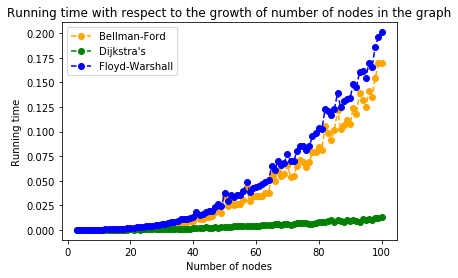

In [21]:
# Import plotting and time libraries 
import matplotlib.pyplot as plt 
import time 

# Initialize the storage array to store the running time of 3 algorithms 
bf_time = [] # Bellman-Ford function
d_time = [] # Dijkstra function
fw_time = [] # Floyd-Warshall function 
x = [i for i in range(3, 101)] # This is the x-axis: Input size from 3 to 100 (inclusize)

# Running time of each algorithm with respect to the growth in input size
# Input ranges from 3 to 100 (inclusive)
for n in range(3, 101, 1): 
    # Create temporary arrays to store the time
    # For each length we would run the function 50 times, then average the results
    bf_time_temp = []
    d_time_temp = []
    fw_time_temp = []
    
    # Run each function 50 times for each input size
    for i in range(50):
        # Create the edge list with nodes 
        data = random_graph_generator(n)

        # Timing the running time of Bellman-Ford algorithm 
        start_BF = time.time()
        BellmanFord_General(0, n-1, n, data)
        end_BF = time.time()
        bf_time_temp.append(end_BF-start_BF)
        
        # Timing the running time of Dijkstra's algorithm 
        start_D = time.time()
        Dijkstra_General(0, n-1, n, data)
        end_D = time.time()
        d_time_temp.append(end_D-start_D)
        
        # Timing the running time of Floyd-Warshall algorithm 
        start_FW = time.time()
        FloydWarshall_General(0, n-1, n, data)
        end_FW = time.time()
        fw_time_temp.append(end_FW-start_FW)
    
    # Average the result of 50 running times. Then append it to the storage array 
    bf_time.append(sum(bf_time_temp)/50)
    d_time.append(sum(d_time_temp)/50)
    fw_time.append(sum(fw_time_temp)/50)
    
# Plot the running time of each function versus its growth in input size   
plt.plot(x, bf_time, color = "orange", linestyle = "dashed", marker='o', label = "Bellman-Ford")   
plt.plot(x, d_time, color = "green", linestyle = "dashed", marker='o', label = "Dijkstra's")   
plt.plot(x, fw_time, color = "blue", linestyle = "dashed", marker='o', label = "Floyd-Warshall")   
plt.xlabel("Number of nodes")
plt.ylabel("Running time")
plt.title("""Running time with respect to the growth of number of nodes in the graph""")
plt.legend()
plt.show() 